In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [1]:
# Assuming categorical columns are ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
#                                 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
#                                 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
                       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
                       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

# Get the numerical columns (excluding 'Customer')
numerical_columns = [col for col in data.columns if col not in categorical_columns and col != 'Customer' and col != "Effective To Date"]



NameError: ignored

In [6]:
numerical_columns

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [7]:

numerical_data = data[numerical_columns]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)


In [8]:

categorical_data = data[categorical_columns]


encoder = OneHotEncoder()
binarized_data = encoder.fit_transform(categorical_data).toarray()

In [9]:

final_data = np.concatenate((standardized_data, binarized_data), axis=1)

In [10]:

pca = PCA()
pca.fit(final_data)

PCA()

In [11]:

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)


n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
final_data_pca = pca.fit_transform(final_data)


In [12]:
final_data_pca

array([[-0.99417192, -0.17032503,  1.85465313, ..., -0.23943876,
         0.11422166,  0.02262193],
       [ 2.20339773, -1.51238054,  0.55831062, ..., -0.03062204,
         0.25002729, -0.32232013],
       [ 0.69353661,  0.9274867 ,  0.28561962, ..., -0.38020607,
        -0.51126786,  0.43225523],
       ...,
       [ 1.42155545, -1.67412438, -0.1688596 , ...,  0.02484637,
         0.17681883, -0.10452475],
       [ 0.72313867, -0.28687234,  2.35707467, ..., -0.28632721,
         0.23404961,  0.06680321],
       [ 0.25562887, -1.71643194, -2.05588841, ...,  0.84703255,
        -0.31383423,  0.0173086 ]])

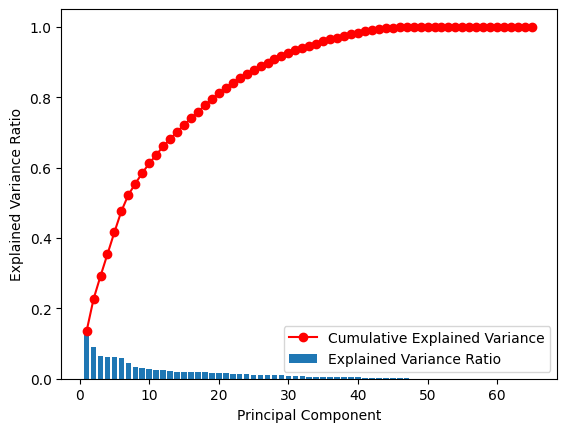

In [13]:
import matplotlib.pyplot as plt


pca_all = PCA()
pca_all.fit(final_data)

explained_variance_ratio = pca_all.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='red',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

In [15]:
label_encoder = LabelEncoder()
categorical_cols = ['Customer', 'State', 'Response', 'Coverage','Education', 'Effective To Date', 'EmploymentStatus','Gender', 'Marital Status', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [16]:
object_cols = data.select_dtypes(include='object').columns
data[object_cols] = data[object_cols].astype('float64')

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

features = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
target = data['Customer Lifetime Value']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


alpha = 0.1  # Regularization strength (a hyperparameter to be tuned)
l1_ratio = 0.5  # Mixing parameter between L1 (Lasso) and L2 (Ridge) regularization

elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_train, y_train)


y_pred = elastic_net.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error:", mse)
#print("R-squared:", r2)


In [18]:
mse

43545209.77055547

In [19]:
r2

0.15505497410840863

In [20]:
from sklearn.model_selection import cross_val_predict


k = 5
elastic_net_cv = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)


y_cv_pred = cross_val_predict(elastic_net_cv, features, target, cv=k)


cv_mse = mean_squared_error(target, y_cv_pred)
cv_r2 = r2_score(target, y_cv_pred)

print("Cross-Validated Mean Squared Error:", cv_mse)
print("Cross-Validated R-squared:", cv_r2)


Cross-Validated Mean Squared Error: 39705146.333585255
Cross-Validated R-squared: 0.15887886006423857


In [21]:
cv_mse

39705146.333585255

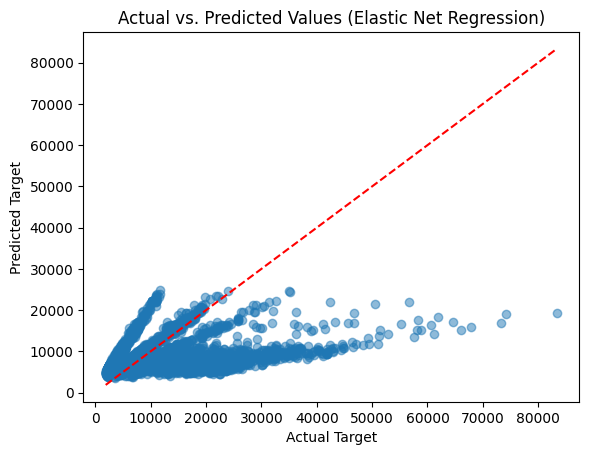

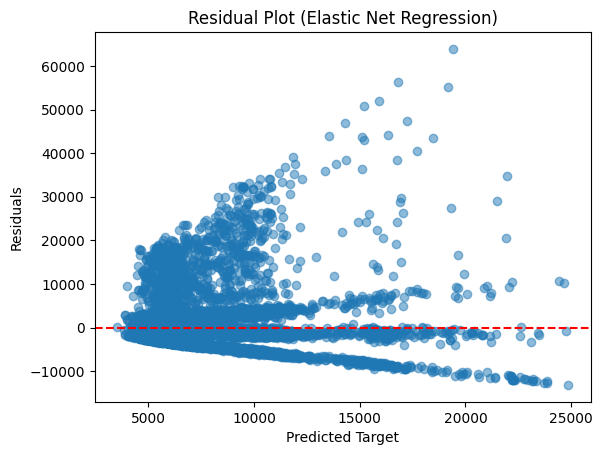

In [22]:
import matplotlib.pyplot as plt


plt.scatter(target, y_cv_pred, alpha=0.5)
plt.plot([min(target), max(target)], [min(target), max(target)], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs. Predicted Values (Elastic Net Regression)')
plt.show()


residuals = target - y_cv_pred
plt.scatter(y_cv_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at y=0 for reference
plt.xlabel('Predicted Target')
plt.ylabel('Residuals')
plt.title('Residual Plot (Elastic Net Regression)')
plt.show()


## What are the key factors that contribute to IBM's customer value? Which demographic characteristics have the highest customer value, how the customer behavior changed from high-value to low-value?

In [23]:
import pandas as pd


data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


correlation_matrix = data.corr()


correlation_with_customer_value = correlation_matrix['Customer Lifetime Value'].sort_values(ascending=False)


print("Top factors contributing to customer value:")
print(correlation_with_customer_value)


Top factors contributing to customer value:
Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64


<ipython-input-23-13baf02e4ffa>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [24]:

demographic_characteristics = ['State', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Vehicle Class', 'Vehicle Size']
average_customer_value_by_demographic = data.groupby(demographic_characteristics)['Customer Lifetime Value'].mean()


highest_customer_value_demographic = average_customer_value_by_demographic.idxmax()
highest_customer_value = average_customer_value_by_demographic.max()

print("Demographic characteristics with the highest customer value:")
print(highest_customer_value_demographic)
print("Average Customer Lifetime Value for this demographic:")
print(highest_customer_value)


Demographic characteristics with the highest customer value:
('Washington', 'Bachelor', 'Employed', 'M', 'Single', 'Luxury SUV', 'Medsize')
Average Customer Lifetime Value for this demographic:
66025.75407


In [25]:

high_value_percentile = 0.90
low_value_percentile = 0.10


high_value_threshold = data['Customer Lifetime Value'].quantile(high_value_percentile)
low_value_threshold = data['Customer Lifetime Value'].quantile(low_value_percentile)


high_value_customers = data[data['Customer Lifetime Value'] >= high_value_threshold]
low_value_customers = data[data['Customer Lifetime Value'] <= low_value_threshold]



high_value_response_rate = high_value_customers['Response'].value_counts(normalize=True)
low_value_response_rate = low_value_customers['Response'].value_counts(normalize=True)

print("Response rate for high-value customers:")
print(high_value_response_rate)

print("Response rate for low-value customers:")
print(low_value_response_rate)


Response rate for high-value customers:
No     0.868709
Yes    0.131291
Name: Response, dtype: float64
Response rate for low-value customers:
No     0.829322
Yes    0.170678
Name: Response, dtype: float64


## Based on lifetime customer value, could we determine the total claim amount applied to each customer group?

In [26]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


low_value_threshold = data['Customer Lifetime Value'].quantile(0.25)
medium_value_threshold = data['Customer Lifetime Value'].quantile(0.5)
high_value_threshold = data['Customer Lifetime Value'].quantile(0.75)

def categorize_customer_group(lifetime_value):
    if lifetime_value <= low_value_threshold:
        return 'Low-Value Customers'
    elif lifetime_value <= medium_value_threshold:
        return 'Medium-Value Customers'
    elif lifetime_value <= high_value_threshold:
        return 'High-Value Customers'
    else:
        return 'Very High-Value Customers'


data['Customer Group'] = data['Customer Lifetime Value'].apply(categorize_customer_group)


total_claim_amount_by_group = data.groupby('Customer Group')['Total Claim Amount'].sum()

total_claim_amount_by_group = total_claim_amount_by_group.round(2)


print("Total claim amount applied to each customer group:")
print(total_claim_amount_by_group)


Total claim amount applied to each customer group:
Customer Group
High-Value Customers         1001461.88
Low-Value Customers           821738.98
Medium-Value Customers        891755.55
Very High-Value Customers    1250010.64
Name: Total Claim Amount, dtype: float64


## Which Sales channels are the most effective for targeting customers with high-value?

In [27]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


high_value_threshold = data['Customer Lifetime Value'].quantile(0.75)

data['High-Value Customer'] = data['Customer Lifetime Value'] >= high_value_threshold


data['Response'] = data['Response'].map({'Yes': 1, 'No': 0})


high_value_response_rate_by_channel = data[data['High-Value Customer']].groupby('Sales Channel')['Response'].mean()


high_value_response_rate_by_channel = high_value_response_rate_by_channel.sort_values(ascending=False)


print("Response rates for each sales channel among high-value customers:")
print(high_value_response_rate_by_channel)


Response rates for each sales channel among high-value customers:
Sales Channel
Agent          0.193326
Web            0.139073
Branch         0.134328
Call Center    0.108352
Name: Response, dtype: float64


## Would marketing campaigns influence customers based on vehicle class and size?

In [28]:
import pandas as pd


data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


data['Response'] = data['Response'].map({'Yes': 1, 'No': 0})


response_rates_by_campaign_class_size = data.groupby(['Renew Offer Type', 'Vehicle Class', 'Vehicle Size'])['Response'].mean()


print("Response rates for each marketing campaign based on vehicle class and size:")
print(response_rates_by_campaign_class_size)


Response rates for each marketing campaign based on vehicle class and size:
Renew Offer Type  Vehicle Class  Vehicle Size
Offer1            Four-Door Car  Large           0.227027
                                 Medsize         0.147619
                                 Small           0.102273
                  Luxury Car     Large           0.000000
                                 Medsize         0.000000
                                                   ...   
Offer4            Sports Car     Medsize         0.000000
                                 Small           0.000000
                  Two-Door Car   Large           0.000000
                                 Medsize         0.000000
                                 Small           0.000000
Name: Response, Length: 72, dtype: float64


In [29]:
import pandas as pd


data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


data['Responded_to_Campaign'] = data['Response'].map({'Yes': 1, 'No': 0})


response_rates_by_vehicle_class = data.groupby(['Vehicle Class'])['Responded_to_Campaign'].mean()


response_rates_by_vehicle_size = data.groupby(['Vehicle Size'])['Responded_to_Campaign'].mean()


print("Response rates by Vehicle Class:")
print(response_rates_by_vehicle_class)

print("\nResponse rates by Vehicle Size:")
print(response_rates_by_vehicle_size)

Response rates by Vehicle Class:
Vehicle Class
Four-Door Car    0.135036
Luxury Car       0.073620
Luxury SUV       0.163043
SUV              0.160356
Sports Car       0.185950
Two-Door Car     0.139979
Name: Responded_to_Campaign, dtype: float64

Response rates by Vehicle Size:
Vehicle Size
Large      0.177590
Medsize    0.146638
Small      0.112245
Name: Responded_to_Campaign, dtype: float64
